In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import graphviz

In [2]:
wine=load_wine()
wine.data.shape

(178, 13)

In [3]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(wine.data,wine.target,test_size=0.2)

In [5]:
# entropy,gini
from sklearn.model_selection import cross_val_score
clf=tree.DecisionTreeClassifier(criterion="gini" 
#                                ,min_samples_leaf=10
                               ,min_samples_split=10
                               ,max_depth=4
                               ,max_features=5
                               ,min_impurity_decrease=0.02)
clf=clf.fit(Xtrain,Ytrain)
prediction=clf.predict(Xtest)
result1=clf.score(Xtest,Ytest)
result1
prediction


array([0, 1, 2, 1, 1, 1, 2, 1, 2, 2, 0, 2, 0, 0, 1, 2, 1, 1, 0, 0, 1, 2,
       2, 1, 1, 2, 0, 1, 2, 1, 0, 2, 0, 2, 1, 1])

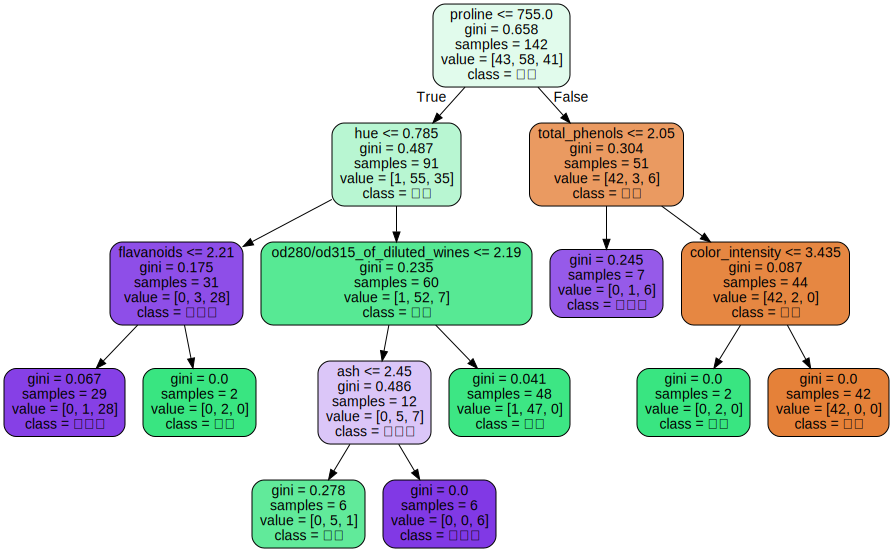

In [8]:
import graphviz
# feature_name=['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','颜色强度','色调','稀释葡萄酒']
dot_data=tree.export_graphviz(clf
                             ,feature_names=wine.feature_names
                             ,class_names=["花酒","清酒","梅子酒"]
                             ,filled=True
                             ,rounded=True)
graph=graphviz.Source(dot_data)
graph

In [6]:
[*zip(wine.feature_names,clf.feature_importances_)]

[('alcohol', 0.4182700776407919),
 ('malic_acid', 0.0),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.0),
 ('total_phenols', 0.07277394977040483),
 ('flavanoids', 0.3721902277172913),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.09618027288417076),
 ('hue', 0.040585471987341123),
 ('od280/od315_of_diluted_wines', 0.0),
 ('proline', 0.0)]

In [7]:
result2=clf.score(Xtrain,Ytrain)
result2

0.9929577464788732

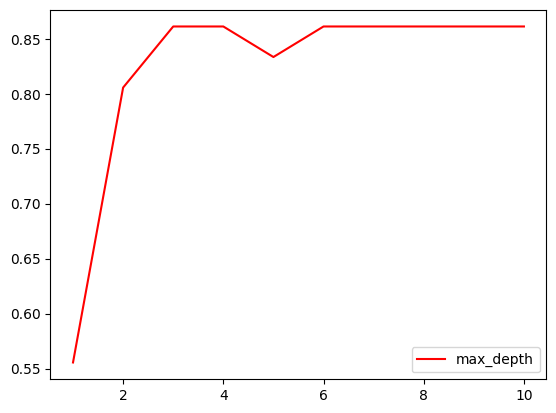

In [8]:
import matplotlib.pyplot as plt

test=[]
for i in range(10):
    clf=tree.DecisionTreeClassifier(max_depth=i+1
                                  ,criterion="entropy"
                                  ,random_state=30
                                  ,splitter="random")
    clf=clf.fit(Xtrain,Ytrain)
    score=clf.score(Xtest,Ytest)
    test.append(score)

plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

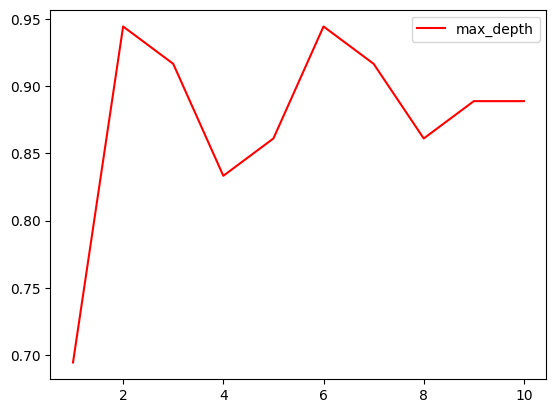

In [9]:
import matplotlib.pyplot as plt

test=[]
for i in range(10):
    clf=tree.DecisionTreeClassifier(max_features=i+1
                                  ,criterion="entropy"
                                  ,random_state=30
                                  ,splitter="random")
    clf=clf.fit(Xtrain,Ytrain)
    score=clf.score(Xtest,Ytest)
    test.append(score)

plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

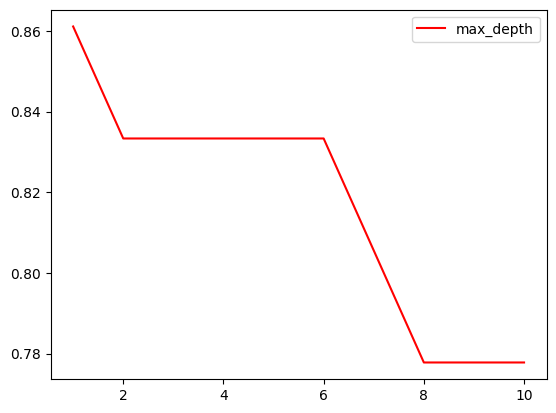

In [10]:
test=[]
for i in range(10,20):
    clf=tree.DecisionTreeClassifier(min_samples_leaf=i-1
                                  ,criterion="entropy"
                                  ,random_state=30
                                  ,splitter="random")
    clf=clf.fit(Xtrain,Ytrain)
    score=clf.score(Xtest,Ytest)
    test.append(score)

plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

In [11]:
clf.predict(Xtest)

array([0, 1, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 2, 0, 1, 2, 1, 0, 1, 0, 2, 1, 2])

In [12]:
clf.apply(Xtest)

array([8, 2, 3, 3, 2, 3, 3, 7, 3, 3, 8, 3, 8, 7, 3, 2, 6, 2, 7, 8, 6, 2,
       2, 6, 2, 3, 8, 6, 3, 6, 8, 2, 8, 3, 6, 3], dtype=int64)